In [1]:
!pip install --quiet qiskit


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --quiet qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.7 MB/s eta 0:00:00:00:01:01


In [88]:
import random
#Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

In [89]:
def encode_qubits(bits, bases):
    ''' 
        bits - list of bits in str type ('0' or '1')
        bases - list of bases ('X' or 'Z')
        
        job - encodes new qubits by scheme with given bits and bases
        
        predefined scheme:
            Z   X
        0  |0> |+>
        1  |1> |->
        
        return - list of encoded qubits
    '''
    
    # ensure that same amount of bits and bases are received
    assert len(bits) == len(bases)
    
    encoded_qubits = []
    for bit, base in zip(bits, bases):
        # Create new quantum circuit for each qubit
        new_qc = QuantumCircuit(1, 1)
       
        # Apply encoding based on the given scheme
        if bit == '0':
            if base == 'Z':
                # 0 - Z -> |0>
                pass  # Already in |0>
            elif base == 'X':
                # 0 - X -> |+>
                new_qc.h(0)
        elif bit == '1':
            if base == 'Z':
                # 1 - Z -> |1>
                new_qc.x(0)
            elif base == 'X':
                # 1 - X -> |->
                new_qc.x(0)
                new_qc.h(0)
        
        encoded_qubits.append(new_qc)
        
    return encoded_qubits


def measure_qubits(qubits, bases):
    '''
        qubits - received list of qubits to measure
        bases - list of bases ('X' or 'Z') to measure qubits in
        
        job - Measures qubits with given bases
        
        return - list of bits given from performed measurement
    '''
    result_bits = []
    
    simulator = AerSimulator()  # Define simulator once before loop

    for qubit, base in zip(qubits, bases):
        # Create a new circuit to measure the qubit
        new_qc = QuantumCircuit(1, 1)
        new_qc.compose(qubit, inplace=True)  # Add the encoded qubit to the circuit

        # Apply the measurement basis
        if base == 'X':
            new_qc.h(0)  # Apply Hadamard before measurement

        new_qc.measure(0, 0)  # Measure the qubit

        # Transpile the circuit for simulation
        transpiled_qc = transpile(new_qc, simulator)

        # Run and get measurement results
        result = simulator.run(transpiled_qc).result()
        counts = result.get_counts(transpiled_qc)

        # Get the most probable measured bit (either '0' or '1')
        measured_bit = max(counts, key=counts.get)
        result_bits.append(measured_bit)

    return result_bits
      
  


def generate_bits(n):
    ''' n amount of bits generator '''
    return [random.choice(['0', '1']) for i in range(n)]


def generate_bases(n):
    ''' n amount of bases generator '''
    return [random.choice(['Z', 'X']) for i in range(n)]    


def eliminate_differences(bits, indexes):
    ''' 
        new list of bits is created by appending bits from user bits,
        where base indexes are matched. Used in comparing phase to filter out
        agreed bits by matched bases
    '''
    result_key = []
    for i in range(len(bits)):
        if i in indexes:
            result_key.append(bits[i])
    
    return result_key

In [90]:
''' Phase 1: Generate, encode and send '''

# Alice generates 500 random bits and bases
alice_bits = generate_bits(600)
alice_bases = generate_bases(600)

# Encoding qubits by generated bits and bases
encoded_qubits = encode_qubits(alice_bits, alice_bases)

# print data 
print('Alice Bits:')
print(alice_bits)

print('Alice Bases:')
print(alice_bases)

# qubits are sent to bob with quantum channel ...

Alice Bits:
['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0

In [ ]:
'''
    Phase 2: Eve Eavesdropping
    
'''
#intercept
eve_bases = generate_bases(600)
eve_bits = measure_qubits(encoded_qubits, eve_bases)

# resend




In [91]:
''' 
    Phase 3: Bob recieves qubits from Alice, bob does 
    not know yet that qubits are intercepted by Eve
'''

# bob measures recieved qubits with random bases
bob_bases = generate_bases(600)
bob_bits = measure_qubits(encoded_qubits, bob_bases)

# print data 
print('Bob Bases:')
print(bob_bases)

print('Bob Bits:')
print(bob_bits)

Bob Bases:
['X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z'

In [92]:
''' Phase 4: Comparing '''

# alice and bob compare bases on public channel, both eliminates own bits where bases are different.

# determine indexes of matched bases in a list
same_base_indexes = []
for i in range(len(alice_bases)):
    if alice_bases[i] == bob_bases[i]:
        same_base_indexes.append(i)
        
# Alice generates own key by eliminating bits
# encoding with different bases by Alice and Bob
alice_key = eliminate_differences(
    alice_bits,
    same_base_indexes
)

print('Alice key:')
print(alice_key)

# Bob does the same...
bob_key = eliminate_differences(
    bob_bits,
    same_base_indexes
)

print('Bob key:')
print(bob_key)


# if keys are different, qubits are surely intercepted by someone.
# else, secret key is safe to encrypt information with
if alice_key == bob_key:
    print('Key is safe to use!')
    print(f'Key length: {len(alice_key)}') 
else:
    print('\n Key is compromised and is not safe!')

Alice key:
['0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1'

In [93]:
original_key=alice_key[0:256]

In [94]:
def measure_qubits_with_noise(qubits, bases, noise_level):
    ''' Measure qubits and introduce noise '''
    result_bits = []
    simulator = AerSimulator()
    
    for qubit, base in zip(qubits, bases):
        new_qc = QuantumCircuit(1, 1)
        new_qc.compose(qubit, inplace=True)
        
        if base == 'X':
            new_qc.h(0)
        
        new_qc.measure(0, 0)
        transpiled_qc = transpile(new_qc, simulator)
        result = simulator.run(transpiled_qc).result()
        counts = result.get_counts(transpiled_qc)
        measured_bit = max(counts, key=counts.get)
        
        # Introduce Distance-Based Noise (Bit Flip Probability)
        noise_prob = min(0.1, np.random.normal(noise_level, 0.005))  # Gaussian variation
        if random.random() < noise_prob:
            measured_bit = '0' if measured_bit == '1' else '1'
        
        result_bits.append(measured_bit)
    
    return result_bits

In [95]:
print(len(original_key))
print(original_key)

256
['0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', 

In [112]:
import numpy as np
import matplotlib.pyplot as plt
# Simulate BER vs. Distance with Smoothing
num_bits = 600  # Increased for better statistics
noise_coefficient = 0.001  # Different noise levels per km
transmission_distances =2  # Distances in km



noise_level = min(0.05, noise_coefficient * transmission_distances)  # Ensures smooth BER variation
received_bits = measure_qubits_with_noise(encoded_qubits, bob_bases, noise_level)


In [113]:
BLOCK_SIZE = 16 

In [114]:
bob_received_key=received_bits[0:256]
bob_received_key = ['0' if x is None else x for x in bob_received_key]
print(len(bob_received_key))
print(bob_received_key)

256
['0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', 

In [115]:
import cv2
import numpy as np
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import hashlib
import os

In [116]:
# Function to compute bitwise similarity between two keys
def key_similarity(alice_key, bob_key):
    alice_bits = bin(int.from_bytes(alice_key, 'big'))[2:].zfill(256)
    bob_bits = bin(int.from_bytes(bob_key, 'big'))[2:].zfill(256)
    matches = sum(1 for a, b in zip(alice_bits, bob_bits) if a == b)
    return matches / 256  # Percentage similarity


In [117]:
# Function to resize image to 256x256 grayscale
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (256, 256))
    return resized_image

# Function to encrypt the image using AES block-wise
def encrypt_image(image, key, encrypted_path):
    cipher = AES.new(key, AES.MODE_CBC)  # Using ECB to ensure independent block encryption
    encrypted_image = np.zeros_like(image)
    
    for i in range(0, image.shape[0], BLOCK_SIZE):
        for j in range(0, image.shape[1], BLOCK_SIZE):
            block = image[i:i+BLOCK_SIZE, j:j+BLOCK_SIZE]
            encrypted_block = cipher.encrypt(block.tobytes())
            encrypted_image[i:i+BLOCK_SIZE, j:j+BLOCK_SIZE] = np.frombuffer(encrypted_block, dtype=np.uint8).reshape(BLOCK_SIZE, BLOCK_SIZE)
    
    cv2.imwrite(encrypted_path, encrypted_image)
    print(f"Encryption successful! Encrypted image saved at: {encrypted_path}")
    return encrypted_image
  

In [118]:
# Function to decrypt the image with gradual noise mixing based on key similarity
def decrypt_image_with_gradual_noise(encrypted_image, alice_key, bob_key, decrypted_path):
    cipher_bob = AES.new(bob_key, AES.MODE_CBC)
    decrypted_image = np.zeros_like(encrypted_image)

    # Calculate key similarity
    similarity = key_similarity(alice_key, bob_key)
    print(f"Key similarity: {similarity:.2f}")  # Print the similarity for debugging

    for i in range(0, encrypted_image.shape[0], BLOCK_SIZE):
        for j in range(0, encrypted_image.shape[1], BLOCK_SIZE):
            block = encrypted_image[i:i+BLOCK_SIZE, j:j+BLOCK_SIZE]
            
            # Apply decryption if the keys are highly similar
            if similarity > 0.9:  # Very high similarity, minimal noise
                decrypted_block = cipher_bob.decrypt(block.tobytes())
                decrypted_image[i:i+BLOCK_SIZE, j:j+BLOCK_SIZE] = np.frombuffer(decrypted_block, dtype=np.uint8).reshape(BLOCK_SIZE, BLOCK_SIZE)
            
            else:  # Introduce noise gradually based on similarity
                noise_factor = 1 - similarity  # Gradually increase noise as similarity decreases
                
                # Ensure that the noise factor is within a sensible range (not too aggressive)
                noise_factor = max(0.1, noise_factor)  # Minimum noise factor to avoid too much noise
                
                noisy_block = np.random.randint(0, 256, (BLOCK_SIZE, BLOCK_SIZE), dtype=np.uint8)
                
                # Gradually mix the decrypted block with noise based on similarity
                decrypted_image[i:i+BLOCK_SIZE, j:j+BLOCK_SIZE] = (
                    (1 - noise_factor) * decrypted_image[i:i+BLOCK_SIZE, j:j+BLOCK_SIZE] + 
                    noise_factor * noisy_block
                ).astype(np.uint8)

    # Save the decrypted image
    cv2.imwrite(decrypted_path, decrypted_image)
    print(f"Decryption with gradual noise successful! Decrypted image saved at: {decrypted_path}")
    return decrypted_image


# Function to display an image in Kaggle Notebook
def display_image(image_path, title="Image"):
    from IPython.display import display
    from PIL import Image
    
    image = Image.open(image_path)
    display(image)
    print(title)

In [119]:
# Load and process image
image_path = "/kaggle/input/cameraman/cameraman.png"
encrypted_path = "/kaggle/working/encrypted_image.png"
decrypted_path = "/kaggle/working/decrypted_image.png"
image = preprocess_image(image_path)

In [120]:
original_key = hashlib.sha256(b"QuantumKeyDistribution").digest()  # Simulated AES key

In [121]:
def list_to_bytes(bit_list):
    # Convert a list of '0'/'1' into a byte object (32 bytes for AES-256)
    bit_string = ''.join(bit_list)
    # Convert bit string to integer, then to bytes
    key_int = int(bit_string, 2)
    return key_int.to_bytes((key_int.bit_length() + 7) // 8, byteorder='big')

# Convert the bob_received_key (list of '0'/'1' bits) to bytes
bob_received_key = list_to_bytes(bob_received_key)


In [122]:
# Encrypt Image with Alice's Key
encrypted_image = encrypt_image(image, original_key, encrypted_path)

# Decrypt Image with Bob's (Possibly Corrupted) Key
decrypted_image = decrypt_image(encrypted_image, original_key, bob_received_key, decrypted_path)

Encryption successful! Encrypted image saved at: /kaggle/working/encrypted_image.png
Decryption with partial error successful! Decrypted image saved at: /kaggle/working/decrypted_image.png


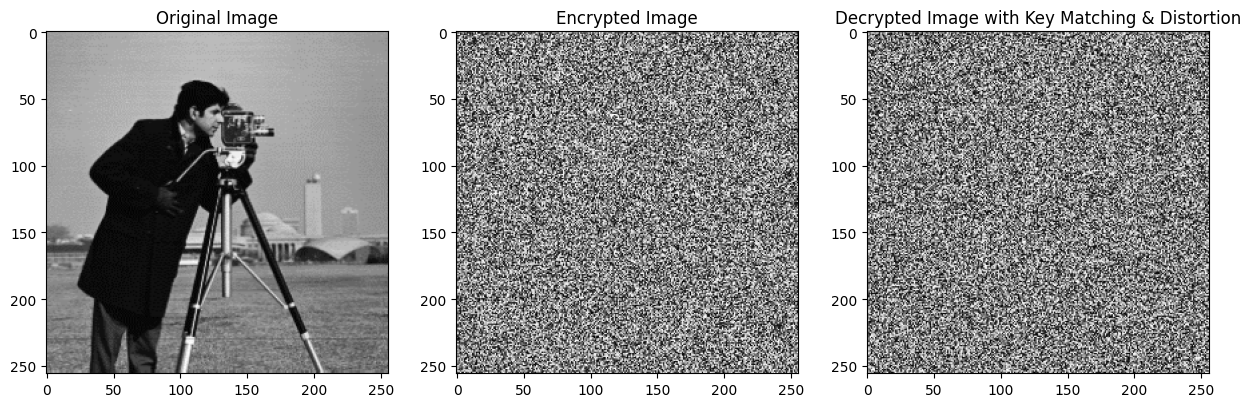

In [123]:
import matplotlib.pyplot as plt

# Display Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(cv2.imread(encrypted_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
axes[1].set_title('Encrypted Image')

axes[2].imshow(cv2.imread(decrypted_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
axes[2].set_title('Decrypted Image with Key Matching & Distortion')

plt.show()
